In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Cleaning Data

In [26]:
temp1_data = pd.read_csv('adult_Income_regression.csv')

temp2_data = temp1_data.drop(temp1_data.columns[[1,2,3,5,6,7,8,10,11]], axis=1)

temp2_data.head(5)

,Age,Education-num,Sex,Hours-per-week,Native-country,Income
0,39,13,Male,40,United-States,<=50K
1,50,13,Male,13,United-States,<=50K
2,38,9,Male,40,United-States,<=50K
3,53,7,Male,40,United-States,<=50K
4,28,13,Female,40,Cuba,<=50K


In [27]:
temp2_data.describe()

,Age,Education-num,Hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456
std,13.640433,2.572720,12.347429
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [28]:
temp2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
Age               32561 non-null int64
Education-num     32561 non-null int64
Sex               32561 non-null object
Hours-per-week    32561 non-null int64
Native-country    32561 non-null object
Income            32561 non-null object
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


In [29]:
#as the number of non-null values in .info() command equal to the
#count values in .describe() command, there is no missing data
temp2_data.dropna(axis = 0, how ='any', inplace=True)

In [30]:
### Create Dummy Columns

In [31]:
Sex = pd.get_dummies(temp2_data.Sex, drop_first=True)
Income = pd.get_dummies(temp2_data['Income'],drop_first=True)
data = pd.concat([temp2_data.drop(["Sex", "Income"], axis=1), Sex, Income], axis=1)
data.rename(columns={' Male':'Male',' >50K':'50K'}, inplace=True)
data.head(5)

,Age,Education-num,Hours-per-week,Native-country,Male,50K
0,39,13,40,United-States,1,0
1,50,13,13,United-States,1,0
2,38,9,40,United-States,1,0
3,53,7,40,United-States,1,0
4,28,13,40,Cuba,0,0


### Deleting the white spaces in "Native-country" column

In [33]:
NorthAmerica_list = ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala","Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua","Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago", "United-States", "North America"]
Asia_list = ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos", "Philippines", "Taiwan", "Thailand", "Vietnam", "Asia"]
SouthAmerica_list = ["Columbia", "Ecuador", "Peru", "South America"]
Europ_list = ["England", "France", "Germany", "Greece", "Holand-Netherlands", "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland","Yugoslavia", "Europ"]



for i in range(data.shape[0]):
    country = data['Native-country'][i].strip()
    
    if country in NorthAmerica_list:
        data['Native-country'][i] = "North America"
    elif country in Asia_list:
        data['Native-country'][i] = "Asia"
    elif country in SouthAmerica_list:
        data['Native-country'][i] = "South America"
    elif country in Europ_list:
        data['Native-country'][i] = "Europ"
    else:
        data['Native-country'][i] = "Other"
    print(i, data['Native-country'][i])

0 North America


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1 North America
2 North America
3 North America
4 North America
5 North America
6 North America
7 North America
8 North America
9 North America
10 North America
11 Asia
12 North America
13 North America
14 Other
15 North America


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


16 North America
17 North America
18 North America
19 North America
20 North America
21 North America
22 North America
23 North America
24 North America
25 North America
26 North America
27 Other
28 North America
29 North America
30 North America
31 North America
32 North America
33 North America
34 North America
35 North America
36 North America
37 North America
38 Other
39 North America
40 North America
41 North America
42 North America
43 North America
44 North America
45 North America
46 North America
47 North America
48 North America
49 North America
50 North America
51 Other
52 North America
53 North America
54 North America
55 North America
56 North America
57 North America
58 North America
59 North America
60 North America
61 Other
62 North America
63 North America
64 North America
65 North America
66 North America
67 North America
68 North America
69 North America
70 North America
71 North America
72 North America
73 North America
74 North America
75 North America
76 North Ame

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


103 North America
104 North America
105 North America
106 North America
107 North America
108 North America
109 North America
110 North America
111 North America
112 North America
113 North America
114 North America
115 North America
116 North America
117 North America
118 North America
119 North America
120 North America
121 North America
122 Europ
123 North America
124 North America
125 North America
126 North America
127 North America
128 North America
129 North America
130 North America
131 North America
132 North America
133 North America
134 North America
135 Asia
136 North America
137 North America
138 North America
139 North America
140 North America
141 North America
142 North America
143 North America
144 North America
145 North America
146 North America
147 North America
148 North America
149 North America
150 North America
151 North America
152 Asia
153 North America
154 North America
155 North America
156 North America
157 North America
158 North America
159 North America


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


235 North America
236 North America
237 Asia
238 North America
239 North America
240 North America
241 North America
242 North America
243 North America
244 North America
245 Other
246 North America
247 North America
248 North America
249 Other
250 North America
251 North America
252 North America
253 North America
254 North America
255 Asia
256 North America
257 North America
258 North America
259 North America
260 North America
261 North America
262 North America
263 North America
264 North America
265 Asia
266 North America
267 North America
268 North America
269 North America
270 North America
271 North America
272 North America
273 North America
274 North America
275 North America
276 North America
277 North America
278 North America
279 North America
280 Europ
281 North America
282 North America
283 North America
284 North America
285 North America
286 North America
287 North America
288 North America
289 South America
290 North America
291 North America
292 North America
293 Nor

707 North America
708 North America
709 North America
710 North America
711 North America
712 Other
713 North America
714 North America
715 North America
716 North America
717 North America
718 North America
719 North America
720 North America
721 North America
722 North America
723 North America
724 North America
725 Other
726 North America
727 North America
728 North America
729 Other
730 North America
731 North America
732 North America
733 North America
734 North America
735 North America
736 North America
737 North America
738 North America
739 North America
740 North America
741 North America
742 North America
743 North America
744 North America
745 North America
746 North America
747 North America
748 North America
749 North America
750 North America
751 North America
752 North America
753 North America
754 North America
755 North America
756 North America
757 North America
758 North America
759 North America
760 North America
761 North America
762 Europ
763 North America
764 No

1173 North America
1174 North America
1175 North America
1176 North America
1177 North America
1178 North America
1179 North America
1180 North America
1181 North America
1182 North America
1183 North America
1184 North America
1185 North America
1186 North America
1187 North America
1188 North America
1189 North America
1190 North America
1191 North America
1192 North America
1193 North America
1194 North America
1195 North America
1196 North America
1197 North America
1198 North America
1199 Other
1200 North America
1201 North America
1202 North America
1203 North America
1204 North America
1205 North America
1206 North America
1207 North America
1208 North America
1209 North America
1210 North America
1211 North America
1212 North America
1213 North America
1214 North America
1215 North America
1216 North America
1217 Asia
1218 North America
1219 North America
1220 North America
1221 North America
1222 North America
1223 North America
1224 Other
1225 North America
1226 North America

1621 North America
1622 Asia
1623 North America
1624 North America
1625 North America
1626 North America
1627 North America
1628 North America
1629 North America
1630 North America
1631 North America
1632 North America
1633 North America
1634 North America
1635 North America
1636 North America
1637 North America
1638 North America
1639 North America
1640 North America
1641 North America
1642 North America
1643 North America
1644 North America
1645 North America
1646 North America
1647 North America
1648 North America
1649 North America
1650 North America
1651 North America
1652 North America
1653 North America
1654 North America
1655 Europ
1656 North America
1657 North America
1658 North America
1659 North America
1660 North America
1661 North America
1662 North America
1663 North America
1664 North America
1665 North America
1666 North America
1667 North America
1668 North America
1669 North America
1670 North America
1671 North America
1672 North America
1673 North America
1674 Europ

2068 North America
2069 North America
2070 North America
2071 North America
2072 North America
2073 North America
2074 North America
2075 North America
2076 North America
2077 North America
2078 North America
2079 North America
2080 North America
2081 North America
2082 North America
2083 North America
2084 North America
2085 North America
2086 North America
2087 North America
2088 North America
2089 North America
2090 North America
2091 North America
2092 North America
2093 North America
2094 North America
2095 North America
2096 Asia
2097 North America
2098 North America
2099 Other
2100 North America
2101 North America
2102 North America
2103 North America
2104 Other
2105 North America
2106 North America
2107 North America
2108 North America
2109 North America
2110 North America
2111 North America
2112 North America
2113 North America
2114 North America
2115 North America
2116 North America
2117 North America
2118 North America
2119 North America
2120 North America
2121 North America

2511 North America
2512 Other
2513 Other
2514 North America
2515 North America
2516 North America
2517 North America
2518 Other
2519 North America
2520 North America
2521 North America
2522 North America
2523 North America
2524 North America
2525 North America
2526 North America
2527 North America
2528 North America
2529 North America
2530 North America
2531 North America
2532 North America
2533 North America
2534 North America
2535 North America
2536 North America
2537 North America
2538 North America
2539 North America
2540 North America
2541 North America
2542 North America
2543 North America
2544 North America
2545 North America
2546 North America
2547 North America
2548 North America
2549 Other
2550 North America
2551 North America
2552 North America
2553 North America
2554 North America
2555 North America
2556 North America
2557 North America
2558 Asia
2559 North America
2560 North America
2561 North America
2562 North America
2563 North America
2564 North America
2565 North Amer

2959 North America
2960 North America
2961 North America
2962 North America
2963 North America
2964 North America
2965 North America
2966 Europ
2967 North America
2968 North America
2969 North America
2970 North America
2971 North America
2972 North America
2973 North America
2974 North America
2975 North America
2976 North America
2977 North America
2978 North America
2979 North America
2980 North America
2981 North America
2982 North America
2983 North America
2984 North America
2985 North America
2986 North America
2987 North America
2988 North America
2989 Asia
2990 North America
2991 North America
2992 South America
2993 North America
2994 Asia
2995 North America
2996 North America
2997 North America
2998 North America
2999 North America
3000 North America
3001 North America
3002 North America
3003 North America
3004 North America
3005 North America
3006 North America
3007 North America
3008 North America
3009 North America
3010 North America
3011 North America
3012 North America


3408 North America
3409 North America
3410 North America
3411 North America
3412 North America
3413 North America
3414 North America
3415 North America
3416 North America
3417 North America
3418 North America
3419 North America
3420 North America
3421 North America
3422 North America
3423 North America
3424 North America
3425 North America
3426 North America
3427 North America
3428 North America
3429 North America
3430 North America
3431 North America
3432 North America
3433 North America
3434 North America
3435 North America
3436 North America
3437 North America
3438 North America
3439 North America
3440 North America
3441 North America
3442 North America
3443 North America
3444 North America
3445 North America
3446 North America
3447 Europ
3448 North America
3449 North America
3450 North America
3451 North America
3452 North America
3453 North America
3454 North America
3455 North America
3456 North America
3457 North America
3458 North America
3459 North America
3460 North America
3

3851 North America
3852 North America
3853 North America
3854 North America
3855 North America
3856 Other
3857 North America
3858 Other
3859 North America
3860 North America
3861 North America
3862 North America
3863 North America
3864 North America
3865 North America
3866 North America
3867 North America
3868 North America
3869 North America
3870 North America
3871 North America
3872 North America
3873 North America
3874 North America
3875 North America
3876 North America
3877 North America
3878 North America
3879 Asia
3880 North America
3881 North America
3882 North America
3883 North America
3884 North America
3885 North America
3886 North America
3887 North America
3888 North America
3889 North America
3890 North America
3891 North America
3892 North America
3893 North America
3894 North America
3895 North America
3896 North America
3897 North America
3898 North America
3899 North America
3900 North America
3901 North America
3902 North America
3903 North America
3904 North America

4294 North America
4295 North America
4296 North America
4297 North America
4298 North America
4299 North America
4300 North America
4301 Other
4302 North America
4303 Asia
4304 North America
4305 North America
4306 North America
4307 North America
4308 North America
4309 North America
4310 South America
4311 North America
4312 North America
4313 North America
4314 North America
4315 North America
4316 North America
4317 North America
4318 North America
4319 North America
4320 North America
4321 North America
4322 North America
4323 North America
4324 North America
4325 North America
4326 Other
4327 North America
4328 North America
4329 North America
4330 North America
4331 North America
4332 North America
4333 North America
4334 North America
4335 North America
4336 North America
4337 Asia
4338 North America
4339 North America
4340 North America
4341 North America
4342 North America
4343 North America
4344 North America
4345 North America
4346 North America
4347 North America
4348 Nor

4748 Europ
4749 North America
4750 North America
4751 North America
4752 North America
4753 North America
4754 North America
4755 North America
4756 North America
4757 North America
4758 North America
4759 North America
4760 North America
4761 North America
4762 North America
4763 North America
4764 North America
4765 Europ
4766 North America
4767 North America
4768 Asia
4769 North America
4770 North America
4771 North America
4772 Other
4773 North America
4774 North America
4775 North America
4776 North America
4777 North America
4778 North America
4779 North America
4780 North America
4781 North America
4782 North America
4783 North America
4784 North America
4785 Asia
4786 Other
4787 North America
4788 North America
4789 North America
4790 North America
4791 North America
4792 North America
4793 North America
4794 North America
4795 North America
4796 North America
4797 North America
4798 North America
4799 North America
4800 North America
4801 North America
4802 North America
4803 

5195 North America
5196 Asia
5197 North America
5198 North America
5199 North America
5200 North America
5201 Other
5202 North America
5203 North America
5204 North America
5205 Asia
5206 North America
5207 North America
5208 North America
5209 North America
5210 North America
5211 North America
5212 North America
5213 North America
5214 North America
5215 North America
5216 North America
5217 North America
5218 North America
5219 Asia
5220 North America
5221 North America
5222 North America
5223 North America
5224 North America
5225 North America
5226 North America
5227 North America
5228 North America
5229 North America
5230 North America
5231 North America
5232 North America
5233 North America
5234 Other
5235 North America
5236 North America
5237 North America
5238 North America
5239 North America
5240 North America
5241 North America
5242 North America
5243 North America
5244 North America
5245 North America
5246 North America
5247 North America
5248 North America
5249 North Americ

5650 North America
5651 North America
5652 North America
5653 North America
5654 North America
5655 North America
5656 North America
5657 North America
5658 North America
5659 North America
5660 North America
5661 North America
5662 North America
5663 Other
5664 North America
5665 North America
5666 North America
5667 North America
5668 North America
5669 North America
5670 North America
5671 North America
5672 North America
5673 North America
5674 North America
5675 North America
5676 North America
5677 North America
5678 North America
5679 North America
5680 North America
5681 North America
5682 North America
5683 Other
5684 North America
5685 North America
5686 North America
5687 North America
5688 North America
5689 North America
5690 North America
5691 North America
5692 North America
5693 North America
5694 North America
5695 North America
5696 North America
5697 North America
5698 Asia
5699 North America
5700 North America
5701 North America
5702 North America
5703 North America

6093 North America
6094 North America
6095 North America
6096 North America
6097 North America
6098 North America
6099 North America
6100 North America
6101 North America
6102 North America
6103 North America
6104 North America
6105 North America
6106 North America
6107 North America
6108 North America
6109 North America
6110 North America
6111 North America
6112 North America
6113 North America
6114 North America
6115 North America
6116 North America
6117 North America
6118 North America
6119 North America
6120 North America
6121 North America
6122 North America
6123 North America
6124 North America
6125 Asia
6126 North America
6127 North America
6128 North America
6129 Other
6130 North America
6131 North America
6132 North America
6133 North America
6134 North America
6135 Europ
6136 North America
6137 North America
6138 North America
6139 North America
6140 North America
6141 North America
6142 North America
6143 North America
6144 North America
6145 North America
6146 North America

6539 North America
6540 North America
6541 North America
6542 North America
6543 North America
6544 North America
6545 North America
6546 North America
6547 North America
6548 North America
6549 Asia
6550 North America
6551 North America
6552 North America
6553 North America
6554 North America
6555 North America
6556 North America
6557 North America
6558 North America
6559 Europ
6560 Asia
6561 North America
6562 North America
6563 North America
6564 North America
6565 North America
6566 North America
6567 North America
6568 North America
6569 North America
6570 Other
6571 North America
6572 North America
6573 North America
6574 North America
6575 North America
6576 North America
6577 North America
6578 North America
6579 North America
6580 Europ
6581 North America
6582 North America
6583 North America
6584 North America
6585 North America
6586 North America
6587 North America
6588 North America
6589 North America
6590 Europ
6591 North America
6592 North America
6593 North America
6594 

6983 North America
6984 North America
6985 North America
6986 North America
6987 North America
6988 North America
6989 North America
6990 North America
6991 North America
6992 North America
6993 North America
6994 North America
6995 North America
6996 North America
6997 North America
6998 North America
6999 North America
7000 North America
7001 North America
7002 North America
7003 North America
7004 North America
7005 North America
7006 North America
7007 North America
7008 North America
7009 North America
7010 North America
7011 North America
7012 North America
7013 North America
7014 North America
7015 North America
7016 North America
7017 North America
7018 North America
7019 North America
7020 North America
7021 North America
7022 North America
7023 North America
7024 North America
7025 North America
7026 North America
7027 North America
7028 North America
7029 North America
7030 North America
7031 North America
7032 North America
7033 North America
7034 North America
7035 North A

7431 North America
7432 North America
7433 North America
7434 North America
7435 North America
7436 North America
7437 North America
7438 North America
7439 North America
7440 North America
7441 North America
7442 North America
7443 North America
7444 North America
7445 North America
7446 North America
7447 North America
7448 North America
7449 North America
7450 North America
7451 North America
7452 North America
7453 North America
7454 North America
7455 North America
7456 North America
7457 North America
7458 North America
7459 North America
7460 North America
7461 Asia
7462 North America
7463 North America
7464 North America
7465 North America
7466 North America
7467 North America
7468 North America
7469 North America
7470 North America
7471 North America
7472 North America
7473 North America
7474 North America
7475 Other
7476 North America
7477 North America
7478 North America
7479 North America
7480 North America
7481 North America
7482 North America
7483 North America
7484 North

7879 North America
7880 North America
7881 North America
7882 North America
7883 North America
7884 North America
7885 North America
7886 North America
7887 North America
7888 North America
7889 North America
7890 Europ
7891 North America
7892 North America
7893 North America
7894 North America
7895 North America
7896 Europ
7897 North America
7898 North America
7899 North America
7900 North America
7901 North America
7902 Other
7903 North America
7904 North America
7905 North America
7906 North America
7907 North America
7908 North America
7909 Asia
7910 North America
7911 North America
7912 North America
7913 North America
7914 North America
7915 North America
7916 North America
7917 North America
7918 North America
7919 North America
7920 North America
7921 South America
7922 North America
7923 North America
7924 North America
7925 North America
7926 North America
7927 North America
7928 North America
7929 North America
7930 North America
7931 North America
7932 Asia
7933 North Ameri

8326 North America
8327 North America
8328 North America
8329 North America
8330 North America
8331 North America
8332 North America
8333 North America
8334 North America
8335 North America
8336 North America
8337 North America
8338 North America
8339 North America
8340 North America
8341 North America
8342 North America
8343 North America
8344 North America
8345 North America
8346 North America
8347 North America
8348 North America
8349 North America
8350 North America
8351 North America
8352 North America
8353 North America
8354 North America
8355 North America
8356 Other
8357 North America
8358 North America
8359 North America
8360 North America
8361 North America
8362 North America
8363 North America
8364 North America
8365 Other
8366 North America
8367 North America
8368 North America
8369 North America
8370 North America
8371 North America
8372 North America
8373 North America
8374 North America
8375 North America
8376 North America
8377 North America
8378 North America
8379 Nort

8769 North America
8770 North America
8771 North America
8772 North America
8773 North America
8774 North America
8775 North America
8776 North America
8777 North America
8778 North America
8779 North America
8780 North America
8781 North America
8782 North America
8783 North America
8784 North America
8785 North America
8786 North America
8787 North America
8788 North America
8789 North America
8790 North America
8791 North America
8792 North America
8793 North America
8794 North America
8795 North America
8796 North America
8797 North America
8798 North America
8799 North America
8800 North America
8801 North America
8802 North America
8803 North America
8804 North America
8805 North America
8806 North America
8807 North America
8808 North America
8809 Asia
8810 North America
8811 North America
8812 North America
8813 North America
8814 North America
8815 North America
8816 North America
8817 North America
8818 North America
8819 North America
8820 North America
8821 North America
88

9212 North America
9213 North America
9214 North America
9215 Asia
9216 North America
9217 North America
9218 North America
9219 North America
9220 North America
9221 North America
9222 North America
9223 North America
9224 North America
9225 Europ
9226 North America
9227 North America
9228 North America
9229 North America
9230 North America
9231 North America
9232 North America
9233 North America
9234 North America
9235 North America
9236 North America
9237 Other
9238 North America
9239 North America
9240 North America
9241 North America
9242 North America
9243 North America
9244 North America
9245 North America
9246 North America
9247 North America
9248 North America
9249 North America
9250 North America
9251 North America
9252 North America
9253 North America
9254 North America
9255 North America
9256 North America
9257 North America
9258 North America
9259 North America
9260 North America
9261 North America
9262 Asia
9263 North America
9264 North America
9265 Europ
9266 North Ameri

9660 North America
9661 North America
9662 North America
9663 North America
9664 North America
9665 South America
9666 North America
9667 North America
9668 North America
9669 North America
9670 North America
9671 North America
9672 North America
9673 North America
9674 North America
9675 North America
9676 North America
9677 North America
9678 Europ
9679 North America
9680 North America
9681 North America
9682 North America
9683 North America
9684 North America
9685 North America
9686 North America
9687 North America
9688 North America
9689 North America
9690 North America
9691 North America
9692 North America
9693 North America
9694 North America
9695 North America
9696 North America
9697 North America
9698 North America
9699 North America
9700 North America
9701 North America
9702 North America
9703 North America
9704 North America
9705 North America
9706 North America
9707 North America
9708 North America
9709 North America
9710 North America
9711 Asia
9712 North America
9713 North

10103 Europ
10104 North America
10105 North America
10106 North America
10107 Asia
10108 North America
10109 North America
10110 North America
10111 North America
10112 North America
10113 North America
10114 North America
10115 North America
10116 North America
10117 North America
10118 North America
10119 North America
10120 North America
10121 North America
10122 North America
10123 North America
10124 North America
10125 Asia
10126 North America
10127 North America
10128 North America
10129 North America
10130 North America
10131 North America
10132 North America
10133 North America
10134 North America
10135 North America
10136 North America
10137 North America
10138 North America
10139 North America
10140 North America
10141 North America
10142 North America
10143 North America
10144 North America
10145 North America
10146 North America
10147 North America
10148 North America
10149 North America
10150 North America
10151 North America
10152 North America
10153 North America
10154 

10526 North America
10527 North America
10528 North America
10529 North America
10530 North America
10531 North America
10532 North America
10533 Europ
10534 Asia
10535 North America
10536 North America
10537 North America
10538 North America
10539 North America
10540 North America
10541 North America
10542 North America
10543 North America
10544 North America
10545 South America
10546 North America
10547 North America
10548 North America
10549 North America
10550 North America
10551 North America
10552 North America
10553 North America
10554 North America
10555 North America
10556 North America
10557 North America
10558 North America
10559 North America
10560 North America
10561 North America
10562 North America
10563 North America
10564 North America
10565 North America
10566 North America
10567 North America
10568 North America
10569 North America
10570 North America
10571 North America
10572 North America
10573 North America
10574 Other
10575 North America
10576 North America
10577

10952 North America
10953 North America
10954 North America
10955 North America
10956 North America
10957 North America
10958 North America
10959 North America
10960 North America
10961 North America
10962 North America
10963 North America
10964 North America
10965 North America
10966 North America
10967 North America
10968 North America
10969 North America
10970 North America
10971 North America
10972 North America
10973 North America
10974 Europ
10975 North America
10976 North America
10977 North America
10978 North America
10979 North America
10980 North America
10981 North America
10982 North America
10983 North America
10984 North America
10985 North America
10986 North America
10987 North America
10988 North America
10989 North America
10990 North America
10991 North America
10992 North America
10993 North America
10994 North America
10995 North America
10996 North America
10997 North America
10998 North America
10999 North America
11000 North America
11001 North America
11002 No

11372 North America
11373 North America
11374 South America
11375 North America
11376 North America
11377 North America
11378 North America
11379 North America
11380 North America
11381 North America
11382 North America
11383 North America
11384 Asia
11385 North America
11386 North America
11387 North America
11388 Asia
11389 North America
11390 North America
11391 North America
11392 North America
11393 North America
11394 North America
11395 North America
11396 North America
11397 North America
11398 North America
11399 North America
11400 North America
11401 North America
11402 North America
11403 North America
11404 North America
11405 North America
11406 North America
11407 North America
11408 North America
11409 North America
11410 North America
11411 North America
11412 North America
11413 North America
11414 North America
11415 North America
11416 North America
11417 North America
11418 North America
11419 North America
11420 North America
11421 North America
11422 North Americ

11795 North America
11796 North America
11797 North America
11798 North America
11799 North America
11800 North America
11801 North America
11802 North America
11803 North America
11804 North America
11805 North America
11806 North America
11807 North America
11808 North America
11809 North America
11810 North America
11811 Europ
11812 North America
11813 North America
11814 North America
11815 North America
11816 North America
11817 North America
11818 North America
11819 North America
11820 North America
11821 North America
11822 North America
11823 North America
11824 North America
11825 North America
11826 North America
11827 North America
11828 North America
11829 North America
11830 North America
11831 Europ
11832 North America
11833 North America
11834 North America
11835 Asia
11836 North America
11837 North America
11838 North America
11839 North America
11840 North America
11841 North America
11842 North America
11843 North America
11844 North America
11845 North America
11846

12219 North America
12220 North America
12221 North America
12222 North America
12223 North America
12224 North America
12225 North America
12226 North America
12227 North America
12228 North America
12229 North America
12230 North America
12231 North America
12232 North America
12233 North America
12234 North America
12235 North America
12236 North America
12237 North America
12238 North America
12239 North America
12240 North America
12241 North America
12242 North America
12243 North America
12244 North America
12245 North America
12246 North America
12247 North America
12248 North America
12249 North America
12250 North America
12251 North America
12252 North America
12253 North America
12254 Europ
12255 North America
12256 North America
12257 North America
12258 North America
12259 North America
12260 Other
12261 Europ
12262 Other
12263 North America
12264 North America
12265 North America
12266 Europ
12267 Europ
12268 North America
12269 North America
12270 North America
12271 No

12642 North America
12643 Other
12644 North America
12645 North America
12646 North America
12647 North America
12648 North America
12649 North America
12650 North America
12651 North America
12652 North America
12653 North America
12654 North America
12655 Other
12656 North America
12657 North America
12658 North America
12659 North America
12660 North America
12661 North America
12662 North America
12663 North America
12664 North America
12665 North America
12666 North America
12667 North America
12668 North America
12669 North America
12670 North America
12671 North America
12672 North America
12673 North America
12674 North America
12675 Asia
12676 North America
12677 North America
12678 North America
12679 North America
12680 North America
12681 North America
12682 North America
12683 North America
12684 North America
12685 North America
12686 North America
12687 North America
12688 North America
12689 North America
12690 Other
12691 North America
12692 North America
12693 North A

13074 North America
13075 North America
13076 North America
13077 North America
13078 North America
13079 North America
13080 North America
13081 North America
13082 South America
13083 North America
13084 North America
13085 North America
13086 North America
13087 North America
13088 Other
13089 North America
13090 North America
13091 North America
13092 North America
13093 North America
13094 North America
13095 North America
13096 North America
13097 North America
13098 North America
13099 North America
13100 North America
13101 North America
13102 North America
13103 North America
13104 North America
13105 North America
13106 North America
13107 North America
13108 North America
13109 North America
13110 North America
13111 North America
13112 North America
13113 North America
13114 North America
13115 Europ
13116 North America
13117 North America
13118 North America
13119 North America
13120 North America
13121 North America
13122 Asia
13123 North America
13124 North America
13125

13498 North America
13499 Other
13500 North America
13501 North America
13502 North America
13503 North America
13504 North America
13505 North America
13506 North America
13507 North America
13508 North America
13509 North America
13510 North America
13511 North America
13512 North America
13513 North America
13514 North America
13515 North America
13516 North America
13517 North America
13518 North America
13519 North America
13520 North America
13521 North America
13522 North America
13523 North America
13524 North America
13525 North America
13526 North America
13527 North America
13528 North America
13529 North America
13530 North America
13531 North America
13532 North America
13533 North America
13534 North America
13535 North America
13536 North America
13537 North America
13538 North America
13539 North America
13540 North America
13541 North America
13542 North America
13543 North America
13544 North America
13545 North America
13546 North America
13547 North America
13548 No

13927 North America
13928 Europ
13929 North America
13930 North America
13931 North America
13932 North America
13933 Other
13934 North America
13935 North America
13936 North America
13937 North America
13938 North America
13939 North America
13940 North America
13941 North America
13942 North America
13943 North America
13944 North America
13945 North America
13946 North America
13947 North America
13948 North America
13949 North America
13950 North America
13951 North America
13952 North America
13953 North America
13954 North America
13955 North America
13956 North America
13957 North America
13958 North America
13959 North America
13960 North America
13961 Asia
13962 North America
13963 North America
13964 North America
13965 North America
13966 North America
13967 North America
13968 North America
13969 North America
13970 North America
13971 Other
13972 North America
13973 North America
13974 North America
13975 North America
13976 North America
13977 North America
13978 North A

14347 North America
14348 North America
14349 North America
14350 North America
14351 North America
14352 North America
14353 North America
14354 North America
14355 North America
14356 Europ
14357 North America
14358 North America
14359 North America
14360 North America
14361 North America
14362 North America
14363 North America
14364 North America
14365 North America
14366 North America
14367 North America
14368 Other
14369 North America
14370 North America
14371 North America
14372 North America
14373 North America
14374 Asia
14375 North America
14376 North America
14377 North America
14378 North America
14379 North America
14380 North America
14381 North America
14382 North America
14383 North America
14384 North America
14385 North America
14386 North America
14387 North America
14388 North America
14389 North America
14390 North America
14391 North America
14392 North America
14393 North America
14394 North America
14395 North America
14396 Asia
14397 North America
14398 North Am

14777 North America
14778 North America
14779 North America
14780 North America
14781 North America
14782 North America
14783 North America
14784 North America
14785 North America
14786 North America
14787 North America
14788 North America
14789 North America
14790 North America
14791 North America
14792 North America
14793 North America
14794 North America
14795 North America
14796 North America
14797 North America
14798 North America
14799 North America
14800 North America
14801 North America
14802 North America
14803 North America
14804 North America
14805 North America
14806 North America
14807 North America
14808 North America
14809 Europ
14810 North America
14811 North America
14812 North America
14813 North America
14814 North America
14815 North America
14816 Asia
14817 North America
14818 North America
14819 North America
14820 North America
14821 North America
14822 North America
14823 North America
14824 North America
14825 North America
14826 North America
14827 North Ameri

15205 North America
15206 North America
15207 North America
15208 North America
15209 North America
15210 South America
15211 North America
15212 North America
15213 North America
15214 North America
15215 North America
15216 North America
15217 North America
15218 North America
15219 Other
15220 North America
15221 North America
15222 Asia
15223 North America
15224 North America
15225 North America
15226 North America
15227 North America
15228 North America
15229 North America
15230 North America
15231 North America
15232 North America
15233 North America
15234 North America
15235 North America
15236 North America
15237 North America
15238 North America
15239 North America
15240 North America
15241 North America
15242 North America
15243 North America
15244 North America
15245 North America
15246 Europ
15247 North America
15248 North America
15249 North America
15250 North America
15251 North America
15252 North America
15253 Asia
15254 North America
15255 North America
15256 North Am

15630 North America
15631 North America
15632 North America
15633 North America
15634 North America
15635 North America
15636 North America
15637 North America
15638 North America
15639 North America
15640 North America
15641 North America
15642 North America
15643 North America
15644 Asia
15645 North America
15646 North America
15647 North America
15648 North America
15649 North America
15650 North America
15651 North America
15652 North America
15653 North America
15654 North America
15655 North America
15656 North America
15657 North America
15658 North America
15659 North America
15660 North America
15661 North America
15662 North America
15663 North America
15664 North America
15665 North America
15666 Europ
15667 North America
15668 Europ
15669 North America
15670 North America
15671 North America
15672 Other
15673 North America
15674 North America
15675 North America
15676 North America
15677 North America
15678 Other
15679 North America
15680 North America
15681 Europ
15682 Nor

16063 North America
16064 North America
16065 North America
16066 North America
16067 North America
16068 Asia
16069 North America
16070 North America
16071 North America
16072 North America
16073 North America
16074 North America
16075 North America
16076 North America
16077 North America
16078 North America
16079 Other
16080 North America
16081 North America
16082 North America
16083 North America
16084 North America
16085 North America
16086 North America
16087 North America
16088 North America
16089 North America
16090 North America
16091 Asia
16092 North America
16093 North America
16094 North America
16095 North America
16096 North America
16097 North America
16098 North America
16099 North America
16100 North America
16101 North America
16102 North America
16103 Asia
16104 North America
16105 North America
16106 North America
16107 Europ
16108 Other
16109 North America
16110 North America
16111 North America
16112 North America
16113 North America
16114 North America
16115 North

16484 North America
16485 North America
16486 North America
16487 North America
16488 Other
16489 North America
16490 North America
16491 North America
16492 North America
16493 North America
16494 Asia
16495 North America
16496 North America
16497 Asia
16498 North America
16499 North America
16500 Other
16501 North America
16502 North America
16503 North America
16504 North America
16505 North America
16506 North America
16507 North America
16508 North America
16509 North America
16510 North America
16511 North America
16512 North America
16513 North America
16514 North America
16515 North America
16516 North America
16517 North America
16518 North America
16519 North America
16520 North America
16521 North America
16522 North America
16523 North America
16524 North America
16525 North America
16526 North America
16527 North America
16528 North America
16529 North America
16530 North America
16531 North America
16532 North America
16533 North America
16534 North America
16535 North Am

16905 North America
16906 North America
16907 North America
16908 North America
16909 North America
16910 North America
16911 North America
16912 North America
16913 North America
16914 North America
16915 North America
16916 North America
16917 North America
16918 South America
16919 North America
16920 North America
16921 North America
16922 North America
16923 Asia
16924 Other
16925 North America
16926 North America
16927 North America
16928 North America
16929 North America
16930 North America
16931 North America
16932 North America
16933 North America
16934 North America
16935 North America
16936 North America
16937 North America
16938 North America
16939 North America
16940 North America
16941 North America
16942 North America
16943 North America
16944 North America
16945 North America
16946 North America
16947 North America
16948 North America
16949 North America
16950 North America
16951 North America
16952 North America
16953 North America
16954 North America
16955 North Ameri

17325 North America
17326 North America
17327 North America
17328 North America
17329 North America
17330 North America
17331 North America
17332 North America
17333 North America
17334 North America
17335 North America
17336 North America
17337 North America
17338 North America
17339 North America
17340 North America
17341 North America
17342 North America
17343 North America
17344 North America
17345 North America
17346 North America
17347 North America
17348 North America
17349 North America
17350 North America
17351 North America
17352 North America
17353 North America
17354 North America
17355 North America
17356 North America
17357 North America
17358 North America
17359 North America
17360 North America
17361 North America
17362 North America
17363 North America
17364 North America
17365 North America
17366 North America
17367 North America
17368 North America
17369 North America
17370 North America
17371 North America
17372 North America
17373 North America
17374 North America


17748 North America
17749 North America
17750 North America
17751 North America
17752 North America
17753 North America
17754 North America
17755 North America
17756 North America
17757 North America
17758 North America
17759 North America
17760 North America
17761 North America
17762 North America
17763 North America
17764 North America
17765 North America
17766 North America
17767 North America
17768 North America
17769 Europ
17770 North America
17771 North America
17772 North America
17773 North America
17774 North America
17775 North America
17776 North America
17777 North America
17778 North America
17779 North America
17780 North America
17781 North America
17782 North America
17783 North America
17784 North America
17785 North America
17786 North America
17787 North America
17788 North America
17789 North America
17790 North America
17791 North America
17792 North America
17793 North America
17794 North America
17795 South America
17796 North America
17797 North America
17798 No

18170 North America
18171 North America
18172 North America
18173 North America
18174 North America
18175 North America
18176 North America
18177 North America
18178 North America
18179 North America
18180 North America
18181 North America
18182 North America
18183 North America
18184 North America
18185 North America
18186 North America
18187 North America
18188 North America
18189 Other
18190 North America
18191 North America
18192 North America
18193 North America
18194 North America
18195 North America
18196 North America
18197 North America
18198 North America
18199 North America
18200 North America
18201 North America
18202 North America
18203 North America
18204 North America
18205 North America
18206 North America
18207 North America
18208 North America
18209 North America
18210 North America
18211 North America
18212 North America
18213 North America
18214 North America
18215 North America
18216 North America
18217 North America
18218 North America
18219 North America
18220 No

18593 North America
18594 North America
18595 North America
18596 North America
18597 North America
18598 North America
18599 North America
18600 North America
18601 North America
18602 North America
18603 North America
18604 North America
18605 North America
18606 North America
18607 North America
18608 North America
18609 North America
18610 North America
18611 North America
18612 North America
18613 North America
18614 North America
18615 Other
18616 North America
18617 North America
18618 North America
18619 North America
18620 North America
18621 North America
18622 North America
18623 North America
18624 North America
18625 North America
18626 North America
18627 North America
18628 North America
18629 North America
18630 North America
18631 North America
18632 North America
18633 North America
18634 North America
18635 North America
18636 North America
18637 North America
18638 North America
18639 North America
18640 North America
18641 North America
18642 North America
18643 No

19018 North America
19019 North America
19020 North America
19021 North America
19022 North America
19023 North America
19024 North America
19025 North America
19026 North America
19027 Asia
19028 North America
19029 North America
19030 North America
19031 North America
19032 North America
19033 North America
19034 North America
19035 Other
19036 North America
19037 Other
19038 Asia
19039 North America
19040 North America
19041 North America
19042 North America
19043 North America
19044 North America
19045 North America
19046 Other
19047 Europ
19048 North America
19049 North America
19050 North America
19051 North America
19052 North America
19053 North America
19054 North America
19055 Other
19056 North America
19057 North America
19058 North America
19059 Europ
19060 North America
19061 North America
19062 North America
19063 North America
19064 North America
19065 North America
19066 North America
19067 North America
19068 North America
19069 North America
19070 North America
19071 

19443 North America
19444 North America
19445 North America
19446 North America
19447 North America
19448 North America
19449 North America
19450 North America
19451 North America
19452 North America
19453 North America
19454 North America
19455 Europ
19456 North America
19457 North America
19458 North America
19459 North America
19460 North America
19461 North America
19462 North America
19463 North America
19464 North America
19465 North America
19466 North America
19467 North America
19468 North America
19469 North America
19470 North America
19471 North America
19472 North America
19473 North America
19474 North America
19475 North America
19476 North America
19477 North America
19478 North America
19479 North America
19480 North America
19481 North America
19482 North America
19483 North America
19484 North America
19485 North America
19486 North America
19487 North America
19488 North America
19489 North America
19490 Other
19491 North America
19492 North America
19493 North Amer

19874 North America
19875 North America
19876 North America
19877 North America
19878 North America
19879 North America
19880 North America
19881 North America
19882 North America
19883 North America
19884 North America
19885 North America
19886 North America
19887 North America
19888 North America
19889 North America
19890 North America
19891 North America
19892 North America
19893 North America
19894 North America
19895 North America
19896 North America
19897 North America
19898 North America
19899 North America
19900 North America
19901 North America
19902 North America
19903 North America
19904 North America
19905 North America
19906 North America
19907 North America
19908 North America
19909 North America
19910 North America
19911 North America
19912 North America
19913 North America
19914 North America
19915 North America
19916 North America
19917 North America
19918 South America
19919 North America
19920 North America
19921 North America
19922 North America
19923 North America


20297 North America
20298 North America
20299 North America
20300 North America
20301 North America
20302 North America
20303 North America
20304 North America
20305 North America
20306 North America
20307 North America
20308 North America
20309 North America
20310 North America
20311 North America
20312 North America
20313 North America
20314 North America
20315 North America
20316 North America
20317 North America
20318 North America
20319 North America
20320 North America
20321 Europ
20322 North America
20323 North America
20324 North America
20325 North America
20326 North America
20327 North America
20328 North America
20329 North America
20330 North America
20331 North America
20332 North America
20333 Other
20334 North America
20335 North America
20336 North America
20337 North America
20338 North America
20339 Europ
20340 North America
20341 North America
20342 North America
20343 North America
20344 North America
20345 North America
20346 North America
20347 North America
2034

20721 North America
20722 North America
20723 North America
20724 North America
20725 North America
20726 North America
20727 North America
20728 North America
20729 North America
20730 North America
20731 North America
20732 North America
20733 North America
20734 North America
20735 North America
20736 North America
20737 North America
20738 North America
20739 North America
20740 North America
20741 North America
20742 North America
20743 North America
20744 North America
20745 North America
20746 North America
20747 Other
20748 North America
20749 North America
20750 North America
20751 North America
20752 North America
20753 North America
20754 North America
20755 North America
20756 North America
20757 North America
20758 North America
20759 North America
20760 North America
20761 North America
20762 North America
20763 North America
20764 North America
20765 North America
20766 North America
20767 North America
20768 North America
20769 North America
20770 North America
20771 No

21144 North America
21145 North America
21146 North America
21147 North America
21148 North America
21149 North America
21150 North America
21151 North America
21152 Europ
21153 North America
21154 North America
21155 North America
21156 North America
21157 North America
21158 Asia
21159 North America
21160 North America
21161 Europ
21162 North America
21163 North America
21164 North America
21165 North America
21166 North America
21167 North America
21168 North America
21169 North America
21170 North America
21171 North America
21172 North America
21173 North America
21174 North America
21175 North America
21176 North America
21177 North America
21178 North America
21179 North America
21180 North America
21181 North America
21182 North America
21183 North America
21184 North America
21185 North America
21186 Europ
21187 North America
21188 North America
21189 North America
21190 North America
21191 North America
21192 North America
21193 North America
21194 North America
21195 Other
2

21570 North America
21571 North America
21572 North America
21573 North America
21574 North America
21575 North America
21576 North America
21577 North America
21578 North America
21579 North America
21580 North America
21581 North America
21582 North America
21583 North America
21584 North America
21585 North America
21586 North America
21587 Europ
21588 North America
21589 North America
21590 North America
21591 North America
21592 North America
21593 North America
21594 North America
21595 North America
21596 North America
21597 North America
21598 North America
21599 North America
21600 North America
21601 North America
21602 North America
21603 North America
21604 North America
21605 North America
21606 North America
21607 North America
21608 North America
21609 North America
21610 North America
21611 Asia
21612 North America
21613 North America
21614 North America
21615 North America
21616 North America
21617 Europ
21618 North America
21619 North America
21620 North America
21621

21993 North America
21994 North America
21995 North America
21996 North America
21997 North America
21998 North America
21999 North America
22000 North America
22001 North America
22002 Other
22003 North America
22004 North America
22005 North America
22006 North America
22007 North America
22008 North America
22009 North America
22010 North America
22011 North America
22012 North America
22013 North America
22014 North America
22015 North America
22016 North America
22017 North America
22018 North America
22019 North America
22020 North America
22021 Asia
22022 Europ
22023 North America
22024 North America
22025 North America
22026 North America
22027 North America
22028 Asia
22029 Other
22030 North America
22031 North America
22032 North America
22033 North America
22034 North America
22035 North America
22036 North America
22037 North America
22038 North America
22039 North America
22040 North America
22041 North America
22042 North America
22043 North America
22044 North America
22

22418 North America
22419 North America
22420 North America
22421 North America
22422 North America
22423 North America
22424 North America
22425 North America
22426 North America
22427 North America
22428 North America
22429 Other
22430 North America
22431 Asia
22432 North America
22433 North America
22434 North America
22435 North America
22436 North America
22437 North America
22438 North America
22439 North America
22440 North America
22441 North America
22442 North America
22443 North America
22444 North America
22445 North America
22446 Other
22447 North America
22448 North America
22449 North America
22450 North America
22451 North America
22452 North America
22453 North America
22454 North America
22455 North America
22456 North America
22457 North America
22458 North America
22459 North America
22460 North America
22461 North America
22462 North America
22463 North America
22464 North America
22465 North America
22466 North America
22467 North America
22468 North America
22469

22849 North America
22850 North America
22851 North America
22852 North America
22853 Europ
22854 North America
22855 North America
22856 North America
22857 North America
22858 North America
22859 North America
22860 North America
22861 Other
22862 North America
22863 North America
22864 North America
22865 North America
22866 North America
22867 North America
22868 North America
22869 North America
22870 North America
22871 North America
22872 North America
22873 North America
22874 North America
22875 North America
22876 Asia
22877 North America
22878 North America
22879 Asia
22880 North America
22881 North America
22882 North America
22883 North America
22884 North America
22885 North America
22886 North America
22887 North America
22888 North America
22889 North America
22890 North America
22891 North America
22892 North America
22893 North America
22894 North America
22895 North America
22896 Other
22897 North America
22898 North America
22899 North America
22900 Asia
22901 North

23276 North America
23277 North America
23278 North America
23279 North America
23280 North America
23281 North America
23282 North America
23283 North America
23284 Other
23285 North America
23286 North America
23287 North America
23288 North America
23289 North America
23290 North America
23291 North America
23292 North America
23293 North America
23294 North America
23295 North America
23296 North America
23297 North America
23298 North America
23299 North America
23300 North America
23301 North America
23302 North America
23303 Europ
23304 North America
23305 North America
23306 North America
23307 North America
23308 North America
23309 North America
23310 North America
23311 North America
23312 North America
23313 North America
23314 North America
23315 Europ
23316 North America
23317 North America
23318 North America
23319 North America
23320 North America
23321 Asia
23322 North America
23323 North America
23324 North America
23325 North America
23326 North America
23327 North A

23699 North America
23700 North America
23701 North America
23702 North America
23703 North America
23704 Other
23705 North America
23706 North America
23707 North America
23708 North America
23709 North America
23710 North America
23711 North America
23712 North America
23713 North America
23714 North America
23715 North America
23716 North America
23717 North America
23718 North America
23719 North America
23720 North America
23721 North America
23722 Europ
23723 North America
23724 North America
23725 North America
23726 North America
23727 North America
23728 North America
23729 Other
23730 North America
23731 North America
23732 North America
23733 North America
23734 North America
23735 Asia
23736 North America
23737 North America
23738 North America
23739 North America
23740 North America
23741 Asia
23742 North America
23743 North America
23744 North America
23745 North America
23746 North America
23747 North America
23748 North America
23749 North America
23750 North America
23

24124 North America
24125 North America
24126 Europ
24127 North America
24128 North America
24129 North America
24130 North America
24131 North America
24132 North America
24133 North America
24134 North America
24135 North America
24136 North America
24137 North America
24138 North America
24139 North America
24140 North America
24141 North America
24142 North America
24143 North America
24144 North America
24145 North America
24146 North America
24147 North America
24148 North America
24149 North America
24150 North America
24151 North America
24152 North America
24153 North America
24154 Asia
24155 North America
24156 Asia
24157 North America
24158 North America
24159 North America
24160 North America
24161 North America
24162 North America
24163 North America
24164 North America
24165 North America
24166 North America
24167 North America
24168 North America
24169 North America
24170 North America
24171 North America
24172 North America
24173 North America
24174 North America
24175 

24549 North America
24550 North America
24551 North America
24552 North America
24553 North America
24554 North America
24555 North America
24556 North America
24557 North America
24558 North America
24559 North America
24560 North America
24561 North America
24562 North America
24563 North America
24564 North America
24565 North America
24566 North America
24567 North America
24568 North America
24569 North America
24570 North America
24571 North America
24572 Other
24573 North America
24574 North America
24575 South America
24576 North America
24577 North America
24578 North America
24579 North America
24580 North America
24581 North America
24582 North America
24583 North America
24584 North America
24585 North America
24586 North America
24587 North America
24588 North America
24589 North America
24590 North America
24591 North America
24592 Other
24593 North America
24594 North America
24595 North America
24596 North America
24597 North America
24598 North America
24599 North Amer

24973 North America
24974 North America
24975 North America
24976 North America
24977 North America
24978 North America
24979 North America
24980 Other
24981 Asia
24982 North America
24983 North America
24984 North America
24985 North America
24986 North America
24987 North America
24988 North America
24989 North America
24990 North America
24991 North America
24992 North America
24993 North America
24994 North America
24995 North America
24996 North America
24997 North America
24998 North America
24999 North America
25000 North America
25001 North America
25002 Asia
25003 North America
25004 North America
25005 North America
25006 North America
25007 North America
25008 North America
25009 North America
25010 Asia
25011 North America
25012 North America
25013 North America
25014 North America
25015 North America
25016 North America
25017 North America
25018 North America
25019 North America
25020 North America
25021 North America
25022 North America
25023 North America
25024 North Ame

25400 North America
25401 North America
25402 North America
25403 North America
25404 North America
25405 North America
25406 North America
25407 North America
25408 North America
25409 North America
25410 North America
25411 North America
25412 North America
25413 Europ
25414 North America
25415 North America
25416 North America
25417 North America
25418 North America
25419 North America
25420 North America
25421 North America
25422 North America
25423 North America
25424 North America
25425 North America
25426 North America
25427 North America
25428 North America
25429 North America
25430 North America
25431 North America
25432 North America
25433 North America
25434 North America
25435 North America
25436 North America
25437 North America
25438 North America
25439 North America
25440 North America
25441 North America
25442 North America
25443 North America
25444 North America
25445 North America
25446 North America
25447 North America
25448 North America
25449 North America
25450 No

25821 North America
25822 North America
25823 North America
25824 North America
25825 North America
25826 North America
25827 North America
25828 North America
25829 North America
25830 North America
25831 North America
25832 North America
25833 North America
25834 North America
25835 North America
25836 Europ
25837 North America
25838 North America
25839 North America
25840 North America
25841 Other
25842 North America
25843 North America
25844 North America
25845 North America
25846 North America
25847 North America
25848 North America
25849 North America
25850 North America
25851 North America
25852 North America
25853 North America
25854 North America
25855 North America
25856 North America
25857 North America
25858 North America
25859 North America
25860 Europ
25861 North America
25862 North America
25863 North America
25864 North America
25865 North America
25866 North America
25867 North America
25868 North America
25869 North America
25870 Other
25871 North America
25872 North 

26245 North America
26246 North America
26247 North America
26248 North America
26249 North America
26250 North America
26251 North America
26252 North America
26253 North America
26254 North America
26255 North America
26256 North America
26257 North America
26258 North America
26259 North America
26260 North America
26261 North America
26262 North America
26263 North America
26264 North America
26265 North America
26266 North America
26267 North America
26268 North America
26269 North America
26270 North America
26271 Other
26272 North America
26273 North America
26274 North America
26275 North America
26276 North America
26277 Europ
26278 North America
26279 North America
26280 North America
26281 North America
26282 North America
26283 North America
26284 North America
26285 North America
26286 North America
26287 North America
26288 North America
26289 North America
26290 North America
26291 North America
26292 North America
26293 North America
26294 North America
26295 North Amer

26670 North America
26671 North America
26672 North America
26673 North America
26674 North America
26675 North America
26676 North America
26677 North America
26678 North America
26679 North America
26680 North America
26681 North America
26682 North America
26683 North America
26684 North America
26685 North America
26686 North America
26687 North America
26688 North America
26689 North America
26690 North America
26691 North America
26692 North America
26693 North America
26694 North America
26695 North America
26696 North America
26697 North America
26698 North America
26699 North America
26700 North America
26701 North America
26702 North America
26703 North America
26704 North America
26705 North America
26706 North America
26707 North America
26708 North America
26709 North America
26710 North America
26711 North America
26712 North America
26713 North America
26714 North America
26715 North America
26716 North America
26717 North America
26718 North America
26719 North America


27093 North America
27094 North America
27095 North America
27096 North America
27097 North America
27098 North America
27099 North America
27100 North America
27101 North America
27102 North America
27103 North America
27104 North America
27105 North America
27106 North America
27107 North America
27108 North America
27109 North America
27110 North America
27111 North America
27112 North America
27113 North America
27114 North America
27115 North America
27116 North America
27117 North America
27118 North America
27119 North America
27120 North America
27121 North America
27122 North America
27123 North America
27124 North America
27125 North America
27126 North America
27127 North America
27128 North America
27129 North America
27130 North America
27131 North America
27132 North America
27133 Other
27134 North America
27135 Asia
27136 North America
27137 North America
27138 North America
27139 North America
27140 North America
27141 Other
27142 North America
27143 North America
27144

27518 Europ
27519 North America
27520 North America
27521 North America
27522 North America
27523 North America
27524 North America
27525 Asia
27526 North America
27527 North America
27528 North America
27529 North America
27530 North America
27531 North America
27532 North America
27533 North America
27534 North America
27535 North America
27536 North America
27537 North America
27538 North America
27539 North America
27540 North America
27541 North America
27542 North America
27543 North America
27544 North America
27545 North America
27546 North America
27547 North America
27548 North America
27549 North America
27550 North America
27551 North America
27552 North America
27553 North America
27554 North America
27555 North America
27556 North America
27557 North America
27558 North America
27559 North America
27560 North America
27561 North America
27562 North America
27563 North America
27564 North America
27565 North America
27566 North America
27567 North America
27568 North Ameri

27947 North America
27948 North America
27949 North America
27950 North America
27951 North America
27952 North America
27953 North America
27954 North America
27955 Europ
27956 North America
27957 North America
27958 North America
27959 North America
27960 North America
27961 North America
27962 North America
27963 North America
27964 North America
27965 North America
27966 North America
27967 North America
27968 North America
27969 North America
27970 North America
27971 North America
27972 North America
27973 North America
27974 Asia
27975 North America
27976 North America
27977 North America
27978 North America
27979 North America
27980 North America
27981 North America
27982 Europ
27983 North America
27984 North America
27985 North America
27986 North America
27987 North America
27988 North America
27989 North America
27990 North America
27991 North America
27992 North America
27993 North America
27994 North America
27995 North America
27996 North America
27997 North America
27998

28374 North America
28375 North America
28376 North America
28377 North America
28378 North America
28379 North America
28380 North America
28381 North America
28382 North America
28383 North America
28384 North America
28385 North America
28386 North America
28387 North America
28388 North America
28389 North America
28390 North America
28391 North America
28392 North America
28393 North America
28394 North America
28395 North America
28396 North America
28397 North America
28398 North America
28399 North America
28400 North America
28401 North America
28402 North America
28403 North America
28404 North America
28405 North America
28406 North America
28407 North America
28408 North America
28409 North America
28410 North America
28411 North America
28412 North America
28413 North America
28414 North America
28415 North America
28416 North America
28417 North America
28418 North America
28419 North America
28420 North America
28421 North America
28422 North America
28423 North America


28797 North America
28798 Asia
28799 North America
28800 Asia
28801 North America
28802 North America
28803 North America
28804 North America
28805 North America
28806 North America
28807 North America
28808 North America
28809 North America
28810 North America
28811 North America
28812 North America
28813 North America
28814 North America
28815 North America
28816 Asia
28817 North America
28818 North America
28819 North America
28820 North America
28821 North America
28822 North America
28823 North America
28824 North America
28825 North America
28826 North America
28827 North America
28828 North America
28829 North America
28830 North America
28831 North America
28832 Europ
28833 North America
28834 North America
28835 Other
28836 North America
28837 North America
28838 North America
28839 North America
28840 North America
28841 Other
28842 North America
28843 North America
28844 North America
28845 Europ
28846 North America
28847 North America
28848 North America
28849 North America

29220 North America
29221 North America
29222 North America
29223 North America
29224 North America
29225 North America
29226 North America
29227 North America
29228 North America
29229 North America
29230 North America
29231 North America
29232 North America
29233 North America
29234 North America
29235 North America
29236 North America
29237 North America
29238 North America
29239 North America
29240 North America
29241 North America
29242 North America
29243 North America
29244 North America
29245 North America
29246 North America
29247 North America
29248 North America
29249 North America
29250 North America
29251 North America
29252 North America
29253 North America
29254 North America
29255 Other
29256 North America
29257 North America
29258 North America
29259 North America
29260 North America
29261 North America
29262 North America
29263 North America
29264 North America
29265 North America
29266 North America
29267 North America
29268 North America
29269 North America
29270 No

29641 North America
29642 North America
29643 North America
29644 North America
29645 North America
29646 North America
29647 North America
29648 North America
29649 North America
29650 North America
29651 North America
29652 North America
29653 North America
29654 North America
29655 North America
29656 North America
29657 North America
29658 North America
29659 North America
29660 North America
29661 North America
29662 North America
29663 North America
29664 North America
29665 North America
29666 North America
29667 North America
29668 North America
29669 North America
29670 North America
29671 North America
29672 North America
29673 North America
29674 North America
29675 North America
29676 North America
29677 North America
29678 North America
29679 North America
29680 Other
29681 North America
29682 Other
29683 North America
29684 North America
29685 North America
29686 North America
29687 North America
29688 North America
29689 North America
29690 North America
29691 North Amer

30059 North America
30060 North America
30061 North America
30062 North America
30063 North America
30064 Europ
30065 North America
30066 North America
30067 North America
30068 North America
30069 North America
30070 North America
30071 North America
30072 North America
30073 North America
30074 North America
30075 North America
30076 North America
30077 North America
30078 North America
30079 North America
30080 North America
30081 North America
30082 North America
30083 North America
30084 North America
30085 North America
30086 North America
30087 North America
30088 North America
30089 North America
30090 North America
30091 North America
30092 North America
30093 North America
30094 North America
30095 North America
30096 North America
30097 North America
30098 North America
30099 North America
30100 North America
30101 North America
30102 North America
30103 North America
30104 North America
30105 Other
30106 North America
30107 North America
30108 North America
30109 North Amer

30484 North America
30485 North America
30486 North America
30487 North America
30488 North America
30489 North America
30490 North America
30491 North America
30492 North America
30493 North America
30494 North America
30495 North America
30496 North America
30497 North America
30498 North America
30499 North America
30500 North America
30501 North America
30502 North America
30503 North America
30504 North America
30505 North America
30506 North America
30507 North America
30508 North America
30509 North America
30510 North America
30511 North America
30512 North America
30513 North America
30514 North America
30515 North America
30516 North America
30517 North America
30518 North America
30519 North America
30520 South America
30521 North America
30522 North America
30523 North America
30524 North America
30525 North America
30526 North America
30527 North America
30528 North America
30529 North America
30530 North America
30531 North America
30532 North America
30533 Other
30534 No

30906 North America
30907 North America
30908 North America
30909 North America
30910 North America
30911 North America
30912 North America
30913 North America
30914 North America
30915 North America
30916 North America
30917 North America
30918 North America
30919 North America
30920 North America
30921 North America
30922 Other
30923 North America
30924 North America
30925 North America
30926 North America
30927 North America
30928 North America
30929 North America
30930 North America
30931 North America
30932 North America
30933 North America
30934 North America
30935 North America
30936 North America
30937 North America
30938 North America
30939 North America
30940 North America
30941 Asia
30942 North America
30943 North America
30944 North America
30945 North America
30946 North America
30947 North America
30948 North America
30949 North America
30950 North America
30951 North America
30952 North America
30953 North America
30954 North America
30955 North America
30956 North Ameri

31332 Asia
31333 North America
31334 North America
31335 North America
31336 Other
31337 North America
31338 Europ
31339 North America
31340 North America
31341 North America
31342 North America
31343 North America
31344 North America
31345 North America
31346 North America
31347 North America
31348 North America
31349 North America
31350 North America
31351 North America
31352 North America
31353 North America
31354 North America
31355 North America
31356 North America
31357 Asia
31358 North America
31359 Other
31360 North America
31361 North America
31362 North America
31363 North America
31364 North America
31365 North America
31366 North America
31367 North America
31368 South America
31369 North America
31370 North America
31371 North America
31372 North America
31373 North America
31374 North America
31375 North America
31376 Europ
31377 Asia
31378 North America
31379 North America
31380 North America
31381 North America
31382 North America
31383 North America
31384 North America

31755 North America
31756 North America
31757 Asia
31758 North America
31759 North America
31760 North America
31761 North America
31762 North America
31763 North America
31764 North America
31765 North America
31766 North America
31767 North America
31768 North America
31769 North America
31770 Asia
31771 North America
31772 North America
31773 North America
31774 North America
31775 North America
31776 Europ
31777 North America
31778 North America
31779 North America
31780 North America
31781 North America
31782 North America
31783 North America
31784 North America
31785 North America
31786 North America
31787 Asia
31788 North America
31789 North America
31790 North America
31791 North America
31792 North America
31793 North America
31794 North America
31795 North America
31796 Other
31797 North America
31798 North America
31799 North America
31800 North America
31801 Europ
31802 North America
31803 North America
31804 North America
31805 North America
31806 North America
31807 North

32179 North America
32180 North America
32181 North America
32182 North America
32183 North America
32184 North America
32185 North America
32186 North America
32187 North America
32188 North America
32189 North America
32190 North America
32191 North America
32192 North America
32193 North America
32194 North America
32195 North America
32196 North America
32197 North America
32198 North America
32199 Asia
32200 North America
32201 North America
32202 North America
32203 Asia
32204 Asia
32205 North America
32206 North America
32207 North America
32208 North America
32209 North America
32210 North America
32211 North America
32212 North America
32213 Other
32214 North America
32215 North America
32216 North America
32217 North America
32218 North America
32219 North America
32220 North America
32221 North America
32222 North America
32223 North America
32224 North America
32225 North America
32226 North America
32227 North America
32228 North America
32229 North America
32230 North Ame

In [34]:
data.head()

,Age,Education-num,Hours-per-week,Native-country,Male,50K
0,39,13,40,North America,1,0
1,50,13,13,North America,1,0
2,38,9,40,North America,1,0
3,53,7,40,North America,1,0
4,28,13,40,North America,0,0


In [35]:
country = pd.get_dummies(data["Native-country"], drop_first=True)
data = pd.concat([data.drop(["Native-country"], axis=1), country], axis=1)
data.head()

,Age,Education-num,Hours-per-week,Male,50K,Europ,North America,Other,South America
0,39,13,40,1,0,0,1,0,0
1,50,13,13,1,0,0,1,0,0
2,38,9,40,1,0,0,1,0,0
3,53,7,40,1,0,0,1,0,0
4,28,13,40,0,0,0,1,0,0


## Converting the country names into 5 categories

In [36]:
data.columns

Index(['Age', 'Education-num', 'Hours-per-week', 'Male', '50K', 'Europ',
       'North America', 'Other', 'South America'],
      dtype='object')

In [37]:
export_csv = data.to_csv(r'C:/Users/Kamran/Documents/Academic/Sheridan College/Machine Learning/Assignments/Assignment 3/Test.csv', index = None, header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Kamran/Documents/Academic/Sheridan College/Machine Learning/Assignments/Assignment 3/Test.csv'

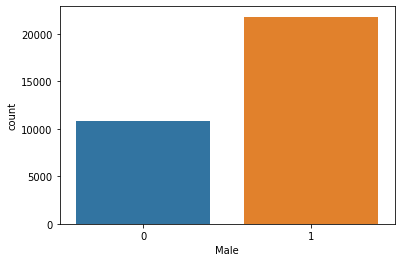

In [38]:
sns.countplot(data["Male"]);

In [ ]:
sns.pairplot(data, hue="Age")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [40]:
X = data.drop(["50K"], axis=1)
Y = data["50K"]

In [41]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: 50K, dtype: uint8

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [43]:
from sklearn.linear_model import LogisticRegression
L_R=LogisticRegression()
L_R.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
Prediction=L_R.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Prediction))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7550
           1       0.64      0.38      0.48      2219

    accuracy                           0.81      9769
   macro avg       0.74      0.66      0.68      9769
weighted avg       0.79      0.81      0.79      9769



In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Prediction))

[[7067  483]
 [1372  847]]
